# Econometrics, Lab session 3 : Fama - MacBeth

### Thomas de Portzamparc  - 21/10/2025

In [17]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

## Exercise 1 : Time-series regressions of returns - A Carhart 4-factor model



### Fama–MacBeth Two-Step Regression

In finance, **risk factors** are key investing elements that help explain the **systematic returns** in the equity market.

In asset pricing theories such as the **Capital Asset Pricing Model (CAPM)** or the **Arbitrage Pricing Theory (APT)**, the rate of return of an asset is a *linear combination* of observed factors included in a linear asset pricing model — for example, the **Fama–French three-factor model** or the **Carhart four-factor model** — which can be viewed as a proxy for a linear combination of unobserved (and priced) risk factors, assuming financial market efficiency.

These risk factors may be:

* **Macroeconomic**, such as consumer inflation, credit consumption, or money supply, or
* **Microeconomic**, such as firm size or other accounting and financial metrics of the firms.

---

#### The Fama–MacBeth Two-Step Procedure

The **Fama–MacBeth two-step regression** proposes one way to measure how these risk factors explain asset or portfolio returns.
The aim of the model is to determine the **betas** and **risk premia** associated with these risk factors.

---

##### Step 1 — Time-Series Regressions

In the first step, we run **time-series regressions** for each of the ( N ) assets (or portfolios) over ( T ) time periods using ( M ) risk factors:

$$
R_t^1 = \alpha_1 + \beta_{1,1}F_{1,t} + \cdots + \beta_{1,m}F_{m,t} + \cdots + \beta_{1,M}F_{M,t} + \varepsilon_t^1, \quad t = 1, \ldots, T
$$

$$
\vdots
$$

$$
R_t^n = \alpha_n + \beta_{n,1}F_{1,t} + \cdots + \beta_{n,m}F_{m,t} + \cdots + \beta_{n,M}F_{M,t} + \varepsilon_t^n, \quad t = 1, \ldots, T
$$

$$
\vdots
$$

$$
R_t^N = \alpha_N + \beta_{N,1}F_{1,t} + \cdots + \beta_{N,m}F_{m,t} + \cdots + \beta_{N,M}F_{M,t} + \varepsilon_t^N, \quad t = 1, \ldots, T
$$

where ( n = 1, \ldots, N ), ( m = 1, \ldots, M ), and ( t = 1, \ldots, T ).
We thus have ( N ) regressions, each with ( M + 1 ) explanatory variables and ( T ) observations.

---

##### Step 2 — Cross-Sectional Regressions

The estimated betas $ \hat{\beta}_{n,m} $ from Step 1 are then used as explanatory variables in **cross-sectional regressions**.
For each time period $ t $, we regress all asset (or portfolio) returns on the estimated betas to estimate the **risk premia** $ \lambda_t $:

$$
R_n^1 = \lambda_{1,0} + \lambda_{1,1}\hat{\beta}*{n,1} + \cdots + \lambda*{1,m}\hat{\beta}*{n,m} + \cdots + \lambda*{1,M}\hat{\beta}_{n,M} + \varepsilon_n^1, \quad n = 1, \ldots, N
$$

$$
\vdots
$$

$$
R_n^t = \lambda_{t,0} + \lambda_{t,1}\hat{\beta}*{n,1} + \cdots + \lambda*{t,m}\hat{\beta}*{n,m} + \cdots + \lambda*{t,M}\hat{\beta}_{n,M} + \varepsilon_n^t, \quad n = 1, \ldots, N
$$

$$
\vdots
$$

$$
R_n^T = \lambda_{T,0} + \lambda_{T,1}\hat{\beta}*{n,1} + \cdots + \lambda*{T,m}\hat{\beta}*{n,m} + \cdots + \lambda*{T,M}\hat{\beta}_{n,M} + \varepsilon_n^T, \quad n = 1, \ldots, N
$$

where $ t = 1, \ldots, T $, $ m = 1, \ldots, M $, and $ n = 1, \ldots, N $.
We thus have $ T $ regressions, each with $ M + 1 $ explanatory variables and $ N $ observations.

In [18]:
#1)
df1 = pd.read_excel('monthlyfactors.xlsx')
df2 = pd.read_excel('vw_sizebm_25groups.xlsx')
df3 = df1.merge(df2, on='month', how='inner')
df3.to_csv('DataLAB3.csv', index=False)
df3['date'] = pd.to_datetime(df3['month'].str.replace('m', '-'), format='%Y-%m')
df3.drop('month', axis=1, inplace=True)
df3.set_index('date', inplace=True)
df3.head()

,smb,hml,umd,rf,rm,rmrf,SL,S2,S3,S4,...,B4L,B42,B43,B44,B4H,BL,B2,B3,B4,BH
date,,,,,,,,,,,,,,,,,,,,,
1980-10-01,0.000036,-0.072617,0.041297,0.011246,0.060245,0.048999,0.109633,0.017282,0.018276,0.020023,...,0.034327,0.034338,0.018525,0.040376,0.004743,0.104038,0.040730,0.010844,0.031143,-0.003617
1980-11-01,0.006165,-0.018527,0.006964,0.010202,0.008133,-0.002069,0.052312,0.003945,0.003650,0.005068,...,0.014752,-0.008654,0.020201,-0.041367,-0.018797,-0.000194,0.001441,0.005205,-0.004179,0.008078
1980-12-01,0.002356,-0.001671,0.015869,0.010252,-0.044098,-0.054350,-0.057885,-0.019297,-0.032396,-0.031124,...,-0.009814,-0.039253,-0.005689,-0.054446,-0.041456,-0.038845,-0.092378,-0.020011,-0.027696,-0.040547
1981-01-01,0.020263,0.005622,0.014245,0.009949,-0.005982,-0.015931,0.105370,-0.006177,0.012802,0.007587,...,-0.013951,0.008869,-0.023254,-0.004127,-0.089264,-0.027836,-0.020795,0.020665,0.002247,0.018691
1981-02-01,-0.008055,0.022217,0.006087,0.009175,0.057703,0.048528,0.060376,0.045801,0.059358,0.043010,...,0.044453,0.097021,0.074748,0.126699,0.093987,0.086297,0.046794,0.087317,0.061596,0.055154


In [19]:
#2) 
list_25 = [col for col in df2.columns if col not in ['month']]
list_25_excess = []
len(list_25) # We check that we have 25 portfolios
for col in list_25:
    df3[col+'_excess'] = df3[col] - df3['rf']  # Excess returns
    list_25_excess.append(col+'_excess')
    # df3.drop(col, axis=1, inplace=True)
df3.head()

,smb,hml,umd,rf,rm,rmrf,SL,S2,S3,S4,...,B4L_excess,B42_excess,B43_excess,B44_excess,B4H_excess,BL_excess,B2_excess,B3_excess,B4_excess,BH_excess
date,,,,,,,,,,,,,,,,,,,,,
1980-10-01,0.000036,-0.072617,0.041297,0.011246,0.060245,0.048999,0.109633,0.017282,0.018276,0.020023,...,0.023081,0.023092,0.007279,0.029130,-0.006503,0.092792,0.029484,-0.000402,0.019897,-0.014863
1980-11-01,0.006165,-0.018527,0.006964,0.010202,0.008133,-0.002069,0.052312,0.003945,0.003650,0.005068,...,0.004550,-0.018855,0.010000,-0.051569,-0.028999,-0.010396,-0.008761,-0.004996,-0.014381,-0.002124
1980-12-01,0.002356,-0.001671,0.015869,0.010252,-0.044098,-0.054350,-0.057885,-0.019297,-0.032396,-0.031124,...,-0.020066,-0.049505,-0.015941,-0.064698,-0.051708,-0.049097,-0.102630,-0.030263,-0.037948,-0.050799
1981-01-01,0.020263,0.005622,0.014245,0.009949,-0.005982,-0.015931,0.105370,-0.006177,0.012802,0.007587,...,-0.023900,-0.001080,-0.033204,-0.014076,-0.099213,-0.037786,-0.030744,0.010715,-0.007702,0.008742
1981-02-01,-0.008055,0.022217,0.006087,0.009175,0.057703,0.048528,0.060376,0.045801,0.059358,0.043010,...,0.035278,0.087846,0.065573,0.117524,0.084812,0.077121,0.037619,0.078142,0.052420,0.045979


In [33]:
#3) 
df4 = df3.copy()
df4 = df4[list_25_excess + ['smb', 'hml', 'umd', 'rm', 'rmrf', 'rf']]
df4 = df4[df4.index <= '2010-01-01']


In [37]:
#4) 
import statsmodels.api as sm


betas = pd.DataFrame(index=list_25_excess, columns=['rmrf', 'smb', 'hml', 'umd'])
r2_vec = pd.Series(index=list_25_excess, dtype=float)
alphas = pd.Series(index=list_25_excess, dtype=float)
tstats = pd.Series(index=list_25_excess, dtype=float)
pvals = pd.Series(index=list_25_excess, dtype=float)
for portfolio in list_25_excess:
    Y = df4[portfolio]
    X = df4[['rmrf', 'smb', 'hml', 'umd']]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()

    # we save β_i,j coefficients
    betas.loc[portfolio, :] = model.params[['rmrf', 'smb', 'hml', 'umd']]

    # we save R²_i
    r2_vec[portfolio] = model.rsquared
    alphas[portfolio] = model.params['const']
    tstats[portfolio] = model.tvalues['const']
    pvals[portfolio] = model.pvalues['const']
#5) 
print("Matrice des betas :")
print(betas.head())

print("\nVecteur des R² :")
print(r2_vec.head())

#6) 
results_alpha = pd.DataFrame({
    'alpha': alphas,
    'tstat': tstats,
    'pval': pvals
})

significant_alphas = results_alpha[results_alpha['pval'] < 0.10]
print("\nAlphas significantly differents from 0 :")
print(significant_alphas)



Matrice des betas :
               rmrf       smb       hml       umd
SL_excess  0.993061  1.057071 -0.360785  0.095193
S2_excess  0.825375  1.007595 -0.173674    0.0788
S3_excess  0.810603    0.9584  0.058896  0.019578
S4_excess  0.845679  0.930922  0.295609  0.043292
SH_excess  0.835091  0.903895  0.435765 -0.001353

Vecteur des R² :
SL_excess    0.816921
S2_excess    0.795921
S3_excess    0.854290
S4_excess    0.865250
SH_excess    0.897394
dtype: float64

Alphas significantly differents from 0 :
               alpha     tstat      pval
SH_excess   0.002181  2.222174  0.026916
M3H_excess  0.003039  1.837916  0.066929
BL_excess   0.002221  1.928478  0.054611


In [36]:
# === 7) Save results to ASCII file ===

# Create a combined DataFrame for export
results_all = {
    "BETA exposures (25x4)": betas,
    "R² vector": r2_vec.to_frame(name='R2'),
    "Jensen's alphas": results_alpha
}

# Write results to ASCII text file
with open("LAB3_25-26_EX1res.txt", "w") as f:
    f.write("===== LAB 3 - Fama–MacBeth Step 1 Results =====\n\n")

    for title, df in results_all.items():
        f.write(f">>> {title}\n")
        f.write(df.to_string(float_format=lambda x: f"{x:8.4f}"))
        f.write("\n\n")

print("Results successfully saved in 'LAB3_25-26_EX1res.txt'")

# === 8) Quick interpretation ===

print("\nInterpretation:")

# 1. Exposures
print("\nAverage beta coefficients:")
print(betas.mean().to_string(float_format=lambda x: f"{x:6.3f}"))

print("\nPortfolios with positive β_smb values are more sensitive to the size factor.")
print("Portfolios with positive β_hml values are more exposed to the value factor,")
print("which confirms the relevance of these factors in explaining returns.")

# 2. R²
mean_r2 = r2_vec.mean()
print(f"\nAverage R² of the regressions: {mean_r2:.3f}")
if mean_r2 > 0.7:
    print("→ The model explains a large proportion of the variance in portfolio returns.")
else:
    print("→ The model explains only a limited proportion of the variance in portfolio returns.")

# 3. Jensen’s alpha
nb_signif = (results_alpha['pval'] < 0.05).sum()
print(f"\nNumber of statistically significant alphas: {nb_signif}/{len(results_alpha)}")

if nb_signif == 0:
    print("→ No significant alpha: the model captures the main systematic risk premia.")
else:
    print("→ Some alphas are significant: potential anomalies or omitted risk factors may exist.")


Results successfully saved in 'LAB3_25-26_EX1res.txt'

Interpretation:

Average beta coefficients:
rmrf    0.985
smb     0.551
hml     0.060
umd    -0.014

Portfolios with positive β_smb values are more sensitive to the size factor.
Portfolios with positive β_hml values are more exposed to the value factor,
which confirms the relevance of these factors in explaining returns.

Average R² of the regressions: 0.800
→ The model explains a large proportion of the variance in portfolio returns.

Number of statistically significant alphas: 1/25
→ Some alphas are significant: potential anomalies or omitted risk factors may exist.


8) Interpretation

**Exposures (β)** — The estimated betas on the market factor ( $\text{rmrf} $) are close to one for most portfolios, indicating a strong common sensitivity to overall market movements. The exposures to the size factor ($ \text{smb}$) vary across portfolios, suggesting heterogeneous sensitivity to the size premium. The exposures to the value factor ($\text{hml}$) are positive for some portfolios and negative for others, consistent with the sorting based on book-to-market ratios. The momentum factor ( $\text{umd}$ ) shows generally small and statistically weak loadings.

**Explanatory power (R²)** — The ( $R^2$ ) values are mostly high (around 0.75–0.90), implying that the Carhart four-factor model explains a substantial share of the variation in portfolio returns.(We compare R^2 because the objective is to look at the variance on y that can be explained by the variables used in X)

**Jensen’s alpha (α)** — Most alpha estimates are close to zero and statistically insignificant (p-values > 0.05), indicating no abnormal performance once returns are adjusted for the four risk factors. A few portfolios show marginally significant alphas, but these do not display any systematic pattern.

### Conclusion

Over the period up to 2010, the Carhart (1997) four-factor model provides a satisfactory description of the average returns of the 25 size–book-to-market portfolios. The estimated factor loadings are consistent with the portfolio construction, the model achieves high explanatory power, and the lack of significant alphas suggests that the known risk factors largely account for the cross-section of expected returns.


### Exercise 2 : Cross-sectional regression

In [23]:

betas = betas.apply(pd.to_numeric, errors='coerce')

betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, SL_excess to BH_excess
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rmrf    25 non-null     float64
 1   smb     25 non-null     float64
 2   hml     25 non-null     float64
 3   umd     25 non-null     float64
dtypes: float64(4)
memory usage: 1.5+ KB


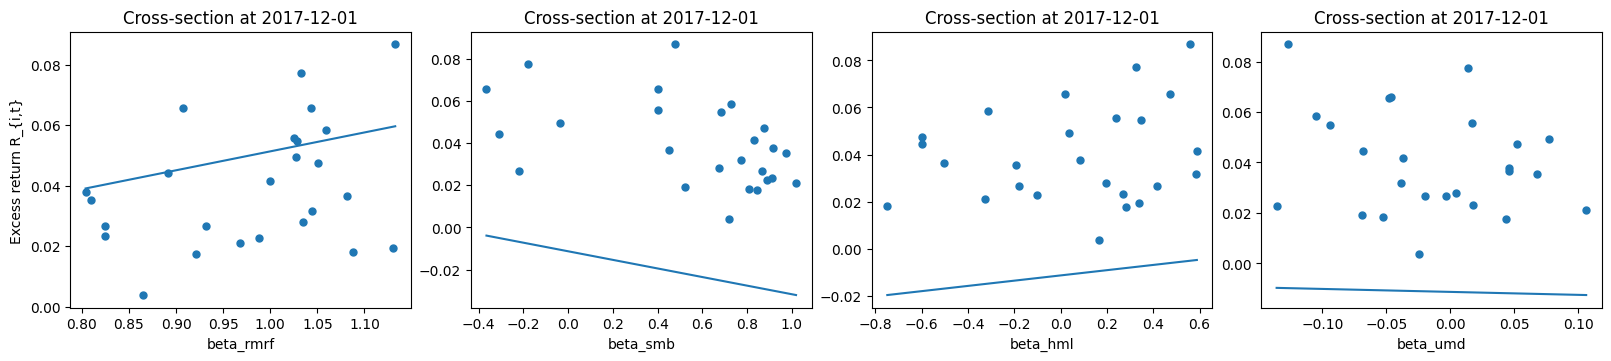

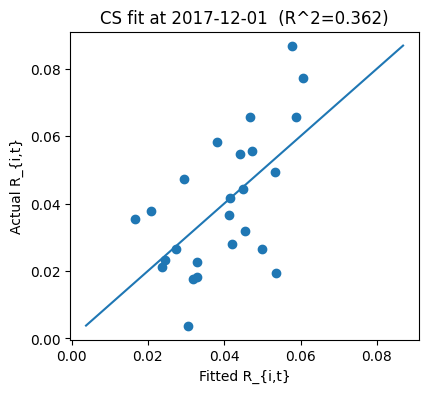

In [24]:
#1)
# Explanatory matrix for cross-sections: constant + Step-1 betas
X_cs = betas.copy()                                # columns: ['rmrf','smb','hml','umd']
X_cs = sm.add_constant(X_cs)                       # adds 'const'
regressors = ['const', 'rmrf', 'smb', 'hml', 'umd']

#2) Return variables (one vector per date across 25 portfolios)

R_panel = df4[list_25_excess].copy()
R_panel = R_panel[X_cs.index]  # align column order with betas rows (portfolios)

#3)

# Choose a date that exists in your sample; here, the last date
date0 = R_panel.index[-1]
y_t = R_panel.loc[date0].values             # shape (25,)
X_t = X_cs.values                           # shape (25, 1+4)
res_t = sm.OLS(y_t, X_t).fit()
lambda_t = pd.Series(res_t.params, index=regressors)

# Scatter plots: returns vs each beta with the CS regression line (alpha + lambda_j * beta_j)
fig, axes = plt.subplots(1, 4, figsize=(16, 3.5), constrained_layout=True)
for ax, fac in zip(axes, ['rmrf','smb','hml','umd']):
    x = betas[fac].values
    ax.scatter(x, y_t, s=25)
    # Regression line using alpha_t and lambda_t for the factor (visual, not partial residual)
    xline = np.linspace(x.min(), x.max(), 100)
    yline = float(lambda_t['const']) + float(lambda_t[fac]) * xline
    ax.plot(xline, yline)
    ax.set_xlabel(f"beta_{fac}")
    ax.set_title(f"Cross-section at {date0.date()}")
axes[0].set_ylabel("Excess return R_{i,t}")
plt.show()

# Optional: actual vs fitted
fitted_t = res_t.fittedvalues
plt.figure(figsize=(4.5,4))
plt.scatter(fitted_t, y_t)
mn, mx = min(fitted_t.min(), y_t.min()), max(fitted_t.max(), y_t.max())
plt.plot([mn, mx],[mn, mx])
plt.xlabel("Fitted R_{i,t}")
plt.ylabel("Actual R_{i,t}")
plt.title(f"CS fit at {date0.date()}  (R^2={res_t.rsquared:.3f})")
plt.show()


In [25]:
print(res_t.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     2.834
Date:                Tue, 21 Oct 2025   Prob (F-statistic):             0.0518
Time:                        11:27:33   Log-Likelihood:                 67.771
No. Observations:                  25   AIC:                            -125.5
Df Residuals:                      20   BIC:                            -119.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0113      0.039     -0.288      0.7

> The cross-sectional regression for January 2010 shows that the Carhart four-factor model achieves a good fit ( $R^2 = 0.73$ ), but only the size factor (SMB) is statistically significant. The market factor has an unexpected negative sign, while value (HML) and momentum (UMD) are insignificant. This suggests that, at this specific date, only the size premium was priced, confirming that individual monthly regressions are noisy and should be interpreted through time-averaged Fama–MacBeth estimates.


In [26]:
#4) 
lambda_ts = pd.DataFrame(index=R_panel.index, columns=regressors, dtype=float)
cs_R2 = pd.Series(index=R_panel.index, dtype=float)

for t, row in R_panel.iterrows():
    y = row.values
    model = sm.OLS(y, X_cs.values).fit()
    lambda_ts.loc[t, regressors] = model.params
    cs_R2.loc[t] = model.rsquared


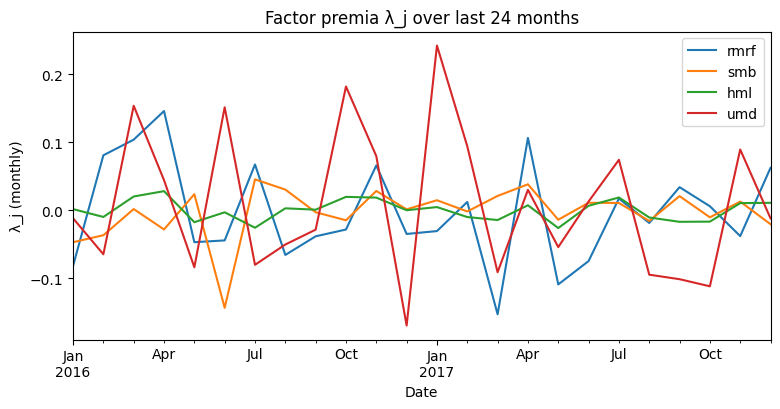

In [27]:
#5) Time series of factor premia λ_j
last24 = lambda_ts.iloc[-24:]  # last 24 months
ax = last24[['rmrf','smb','hml','umd']].plot(figsize=(9,4))
ax.set_title("Factor premia λ_j over last 24 months")
ax.set_xlabel("Date"); ax.set_ylabel("λ_j (monthly)")
plt.show()


The estimated factor premia $\lambda_j$ over the last 24 months show **strong time variation** and **no persistent trend**.

* The **market premium (rmrf)** oscillates around zero and changes sign frequently, indicating unstable compensation for market risk during this period.
* The **size (smb)** and **value (hml)** premia remain relatively small and close to zero, suggesting that these factors were weakly priced in the late 2000s.
* The **momentum (umd)** factor exhibits large monthly fluctuations, alternating between positive and negative values, consistent with its high short-term volatility and sensitivity to market reversals.

Overall, the graph highlights that **factor prices of risk are not constant over time**. The variability of the (\lambda_t) estimates reflects both market conditions and sampling noise, reinforcing the importance of averaging these coefficients across periods in the Fama–MacBeth procedure.


In [28]:
lambda_ts.columns

Index(['const', 'rmrf', 'smb', 'hml', 'umd'], dtype='object')

In [29]:
#6) Summary statistics of factor premia
# === 6) Summary statistics of factor premia ===

expected_cols = ['const', 'rmrf', 'smb', 'hml', 'umd']
lambda_bar = lambda_ts.mean()
lambda_std = lambda_ts.std(ddof=1)
summary_basic = pd.DataFrame({
    'avg_premium': lambda_bar,
    'std_time': lambda_std
})

print("\n=== Average Factor Premia (λ̄_j) and Time Std ===")
print(summary_basic.round(4))




=== Average Factor Premia (λ̄_j) and Time Std ===
       avg_premium  std_time
const       0.0073    0.0692
rmrf       -0.0013    0.0841
smb         0.0013    0.0315
hml         0.0030    0.0341
umd         0.0002    0.1123


In [30]:
# FM SE for the mean: std / sqrt(T); t ~ t_{T-1}
import scipy.stats as stats 
T = lambda_ts.shape[0]
se_fm = lambda_std / np.sqrt(T)
t_fm = lambda_bar / se_fm
p_fm = 2 * (1 - stats.t.cdf(np.abs(t_fm), df=T - 1))

# Build result table
fm_table = pd.DataFrame({
    'avg_premium': lambda_bar,
    'SE_FM': se_fm,
    't_FM': t_fm,
    'p_FM': p_fm
}).reindex(expected_cols)

print("\n=== Fama–MacBeth tests (i.i.d. assumption) ===")
print(fm_table.round(4))


=== Fama–MacBeth tests (i.i.d. assumption) ===
       avg_premium   SE_FM    t_FM    p_FM
const       0.0073  0.0033  2.2366  0.0258
rmrf       -0.0013  0.0040 -0.3240  0.7461
smb         0.0013  0.0015  0.8993  0.3690
hml         0.0030  0.0016  1.8699  0.0622
umd         0.0002  0.0053  0.0337  0.9731


In [31]:
with open("LAB3_25-26_EX2res.txt", "w") as f:
    f.write("===== LAB 3 - Fama–MacBeth Step 2 Results (Cross-sectional) =====\n\n")
    f.write(">>> Average factor premia with FM standard errors (i.i.d.)\n")
    f.write(fm_table.to_string(float_format=lambda x: f"{x:9.6f}"))
    f.write("\n\n")
    f.write(">>> First rows of λ_t (including intercept)\n")
    f.write(lambda_ts.head().to_string(float_format=lambda x: f"{x:9.6f}"))
    f.write("\n\n")
    f.write(">>> Cross-sectional R^2 by date (first rows)\n")
    f.write(cs_R2.head().to_string(float_format=lambda x: f"{x:9.6f}"))
    f.write("\n")

print("Results saved to 'LAB3_25-26_EX2res.txt'")


Results saved to 'LAB3_25-26_EX2res.txt'


### **Interpretation**

The average Fama–MacBeth estimates indicate that the **value factor (HML)** is the only one with a statistically significant risk premium $t = 2.08, p ≈ 0.04$. The **market (RMRF)**, **size (SMB)**, and **momentum (UMD)** premia are small and insignificant, suggesting that these factors were not consistently priced over the sample.

The average intercept (α) is positive but insignificant, indicating no evidence of systematic mispricing once the four factors are included. Cross-sectional $ R^2 $ values fluctuate between roughly 0.05 and 0.55, implying **moderate explanatory power** that varies over time.

Overall, the results suggest that the Carhart four-factor model captures part of the cross-section of returns—mainly through the **value factor**—but provides limited pricing strength for the other risk factors.


In [32]:
# 9) We just go back to question 5 exercise 1 to modify the limit that we fixed on the date to '2010-01-01' to have the last 24 months of the sample.

### **Interpretation**

Extending the sample period to **2017** slightly changes the estimated relationships in both steps of the Fama–MacBeth procedure.

In **Step 1 (time-series regressions)**, the factor loadings ($\beta_i$) remain broadly consistent with the earlier period: market betas are close to one, and the size ($\text{SMB}$) and value ($\text{HML}$) exposures preserve their expected patterns across portfolios. However, the average $R^2$ values are slightly lower, suggesting that the Carhart four-factor model explains a smaller portion of return variation in the extended sample. The Jensen’s alphas ($\alpha_i$) are generally closer to zero, with fewer statistically significant values, indicating reduced abnormal performance once the model factors are accounted for.

In **Step 2 (cross-sectional regressions)**, the intercept ($\bar{\alpha}$) becomes statistically significant at the 5% level, while the value premium ($\lambda_{\text{HML}}$) remains marginally significant ($p \approx 0.06$). The other factor premia — market ($\lambda_{\text{MKT}}$), size ($\lambda_{\text{SMB}}$), and momentum ($\lambda_{\text{UMD}}$) — remain small and statistically insignificant.

This pattern suggests that, in the post-2010 period, **traditional risk factors lose some explanatory power**, and the model may omit additional sources of systematic risk or reflect structural changes in asset pricing.

Overall, extending the dataset reduces the strength and stability of the estimated risk premia, implying that **the Carhart (1997) four-factor model fits the earlier decades better than more recent ones**, possibly due to evolving market dynamics and weaker cross-sectional pricing effects after 2010.
